In [1]:
import os
os.chdir(r'C:\Users\Pedram\Documents\GitHub\Forecast-Regression-Onlinequiz\Forecast-ABtest-Regression--GradeCompletedLesson')
print(os.getcwd())

C:\Users\Pedram\Documents\GitHub\Forecast-Regression-Onlinequiz\Forecast-ABtest-Regression--GradeCompletedLesson


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Read in the data
codecademy = pd.read_csv('codecademy.csv', delimiter=';')

# Print the first five rows
print(codecademy.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


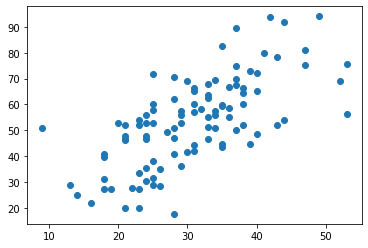

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a scatter plot of score vs completed
plt.scatter(codecademy.completed, codecademy.score)

# Show then clear plot
plt.show()
plt.clf()


Intercept    13.214113
completed     1.306826
dtype: float64


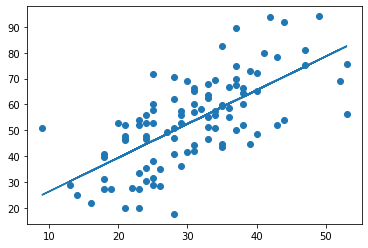

<Figure size 432x288 with 0 Axes>

In [9]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('score ~ completed', codecademy)
results = model.fit()
print(results.params)

# Intercept interpretation:
# A learner who has previously completed 0 content items is expected to earn a quiz score of 13.2 points.

# Slope interpretation:
# Students who have completed one additional prior content item are expected to score 1.3 points higher on the quiz.

# Plot the scatter plot with the line on top
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, results.predict(codecademy))
# Show then clear plot
plt.show()
plt.clf()


predicted score for learner who has completed 20 prior lessons:  0    39.350625
dtype: float64


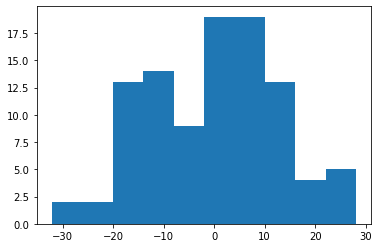

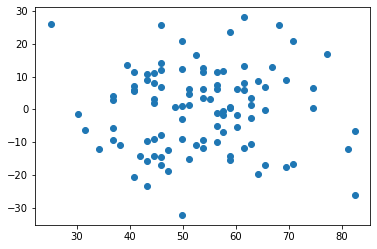

<Figure size 432x288 with 0 Axes>

In [10]:
# Predict score for learner who has completed 20 prior lessons
pred20 = results.params[0] + results.params[1]*20
#OR
newdata = {'completed':[20]}
pred20 = results.predict(newdata)
print('predicted score for learner who has completed 20 prior lessons: ', pred20)

# Calculate fitted values
fitted_values = results.predict(codecademy)

# Calculate residuals
residuals = codecademy.score - fitted_values

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

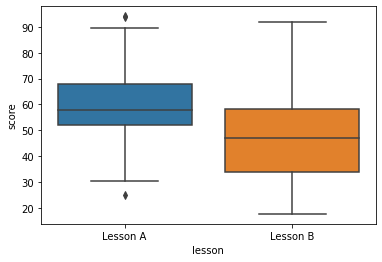

<Figure size 432x288 with 0 Axes>

In [13]:

# Create a boxplot of score vs lesson
sns.boxplot(x = 'lesson', y = 'score', data = codecademy)

# Show then clear plot
plt.show()
plt.clf()


Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64
Mean score (A):  59.22
Mean score (B):  47.57800000000001
Mean score difference:  11.641999999999989
lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64


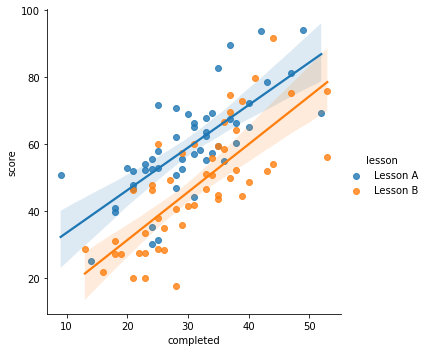

    score  completed    lesson
0    82.7       35.0  Lesson A
1    65.2       31.0  Lesson A
2    55.3       33.0  Lesson A
3    28.8       25.0  Lesson B
4    31.2       18.0  Lesson B
..    ...        ...       ...
95   60.0       31.0  Lesson B
96   75.8       53.0  Lesson B
97   27.4       23.0  Lesson B
98   46.6       21.0  Lesson A
99   57.3       29.0  Lesson B

[100 rows x 3 columns]


In [14]:

# Fit a linear regression to predict score based on which lesson they took
model = sm.OLS.from_formula('score ~ lesson', codecademy)
results = model.fit()
print(results.params)

# Calculate and print the group means and mean difference(for comparison)
mean_score_lessonA = np.mean(codecademy.score[codecademy.lesson == 'Lesson A'])
mean_score_lessonB = np.mean(codecademy.score[codecademy.lesson == 'Lesson B'])
print('Mean score (A): ', mean_score_lessonA)
print('Mean score (B): ', mean_score_lessonB)
print('Mean score difference: ', mean_score_lessonA - mean_score_lessonB)

#OR alternatively

print(codecademy.groupby('lesson').mean().score)

# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()

print(codecademy)